Extreme Gradient Boosting - Classifier

In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer                  # binary dataset
from sklearn.model_selection import train_test_split             # split dataset
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Import XGBoost
from xgboost import XGBClassifier

In [3]:
# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)          # features
y = pd.Series(data.target)                                       # labels: 0 or 1

In [4]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
# Step 4: Initialize XGBClassifier
model = XGBClassifier(
    n_estimators=200,          # number of boosting rounds
    learning_rate=0.1,         # shrinkage parameter
    max_depth=3,               # depth of each tree
    subsample=0.8,             # percentage of samples per tree
    colsample_bytree=0.8,      # percentage of features per tree
    gamma=0,                   # minimum loss reduction required for split
    reg_alpha=0,               # L1 regularization (sparsity)
    reg_lambda=1,              # L2 regularization (stability)
    objective='binary:logistic', # logistic regression for classification
    eval_metric='logloss',     # evaluation metric
    random_state=42
)

In [9]:
# Step 5: Train model
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)                      # predicted labels (0 or 1)

In [10]:
# Step 7: Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.956140350877193
Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1 Score: 0.9659863945578231


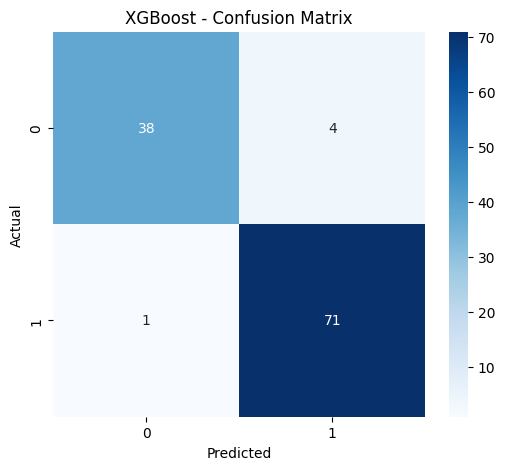

In [12]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [13]:
# Step 9: Hyperparameter Tuning Example
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200],
}

grid = GridSearchCV(
    model,
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [14]:
# Step 10: Save model + predictions
joblib.dump(model, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\xgboostClassifier_model.pkl")
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\XGBoost_Clasifier_Predictions.csv", index=False)

XGBRegressor (Quick Demo)

In [15]:
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

data_reg = fetch_california_housing(as_frame=True)
Xr = data_reg.data
yr = data_reg.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

print("XGB Regression R2:", r2_score(yr_test, yr_pred))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))


XGB Regression R2: 0.8310882080621802
RMSE: 0.4704716024225882
